# 9. Numerical Integration
---
**Content:**
- [Analytic Integration using Sympy](#Analytic-Integration-using-Sympy)
- [Numerical Integration: Rectangle Method / Riemann Sum](#Numerical-Integration:-Rectangle-Method-/-Riemann-Sum)
- [Numerical Integration: Trapezoid Method](#Numerical-Integration:-Trapezoid-Method)
- [Numerical Integration: Gaussian Quadrature](#Numerical-Integration:-Gaussian-Quadrature)
- [Numerical Integration: Comparison](#Numerical-Integration:-Comparison)
- [$\pm \infty$ as Integral Limits](#$\pm-\infty$-as-Integral-Limits)
- [Integration of Sampled Data](#Integration-of-Sampled-Data)
- [Multi-dimensional Integrals](#Multi-dimensional-Integrals)

We will use the standard packages:

In [ ]:
import matplotlib.pylab as plt
import numpy as np

## The Problem
---
We aim to calculate the following integral:
$$ A = \int_0^2 x^4 - 2x + 1 \, dx$$
or in general:
$$ A = \int_a^b f(x) \, dx$$

Define and plot $f(x)$:

In [ ]:
def f(x):
    return x**4.0 - 2.0*x + 1.0

x = np.linspace(-1, 3, 100)

plt.figure(1)
plt.plot(x, f(x))
plt.show()

## <font color=red>Analytic</font> Integration using `sympy`
---
For a full introduction to sympy see: https://www.sympy.org

$$ 
    A = \int_0^2 x^4 - 2x + 1 \, dx
      = \left[ \frac{1}{5} x^5 - x^2 + x \right]_0^2 = 4.4
$$

In [ ]:
import sympy as sp

# define our SYMBOLIC variable
x = sp.symbols('x')

# get the ANALYTIC solution
A = sp.integrate( f(x), x )

print( A )

Now let's evaluate the definite integral:

In [ ]:
# Variant 1: Via substituting x with 2 and 0
AAnalytic1 = A.subs(x, 2) - A.subs(x, 0)

# Variant 2: Via direct integration
AAnalytic2 = sp.integrate( f(x), (x, 0, 2) )

# print it:
print( " variant 1:", AAnalytic1 )
print( " variant 2:", AAnalytic2 )

In [ ]:
%timeit sp.integrate( f(x), x ).subs(x, 2) - sp.integrate( f(x), x ).subs(x, 0)
%timeit sp.integrate( f(x), (x, 0, 2) )

## Numerical Integration: Rectangle Method / Riemann Sum (midpoint)
---

<table>
    <tr>
        <td>
$$ \large A = \int_a^b f(x) \, dx \approx \sum_{i=0}^N f(x_i) \Delta_i$$
$$ \text{with} \quad x_i = a + (i + 0.5) \Delta_i \quad \text{and} \quad \Delta_i = \frac{b-a}{N} $$
        </td>
        <td>
<center>


    
</center>
        </td>
    </tr>
</table>

In [ ]:
# define borders and number of steps
a = 0
b = 2
N = 15

# setup step size
delta = (b - a) / N

# setup xi grid
xi = np.arange(a + delta / 2.0, b, delta) # excludes b !

print( "step size:", delta )
print( "  xi grid:", xi )

Perform the sum via `for` loop:

In [ ]:
ANum = 0.0
for i in range(0, N):
    ANum += f( xi[i] ) * delta
    
print( " numerical:", ANum  )
print( "analytical:", AAnalytic1 )

Or more clever using Numpy's `sum()`:

In [ ]:
ANum = np.sum( f( xi ) * delta )

print( " numerical:", ANum  )
print( "analytical:", AAnalytic1 )

Move everything to a function:

In [ ]:
def myIntRiemann(f, a, b, N, useNumpy):
    
    delta = (b - a) / N

    xi = np.arange(a + delta / 2.0, b, delta) # excludes b !
    
    if(useNumpy == True):
        ANum = np.sum( f(xi) * delta )
    else:
        ANum = 0.0
        for n in range(0, N):
            ANum += f(xi[n]) * delta
    
    return ANum

print( " numerical:", myIntRiemann(f, a=0, b=2, N=10, useNumpy=False) )
print( "analytical:", AAnalytic1 )

In [ ]:
%timeit myIntRiemann(f, a=0, b=2, N=50, useNumpy=False) 
%timeit myIntRiemann(f, a=0, b=2, N=50, useNumpy=True) 

In [ ]:
print( myIntRiemann(f, a=0, b=2, N=10, useNumpy=True) )
print( myIntRiemann(f, a=0, b=2, N=20, useNumpy=True) )
print( myIntRiemann(f, a=0, b=2, N=40, useNumpy=True) )
print( "analytical:", AAnalytic1 )

Let's plot it:

In [ ]:
An = []
nList = np.arange(20, 140, 20)

for n in nList:
    An.append( myIntRiemann(f, a=0, b=2, N=n, useNumpy=True) )
    
plt.figure(1)
plt.grid(True)
    
plt.plot(nList, An, 'bo-')
    
plt.xlabel("N")
plt.ylabel("numerical integral")
plt.show()

## Numerical Integration: Trapezoid Method
---
<table>
    <tr>
        <td>
$$ \large A = \int_a^b f(x) \, dx 
\approx \frac{\Delta x}{2} \sum_{k=1}^N \left[ f(x_{k-1}) + f(x_k) \right]$$
$$\large A \approx \frac{\Delta x}{2} \left( f(x_0) + f(x_N) + 2 \sum_{k=1}^{N-1} f(x_k) \right) $$
            
$$ \text{with} \quad x_k = a + k \Delta x \quad \text{and} \quad \Delta x = \frac{b-a}{N} $$
        </td>
        <td>
<center>
    
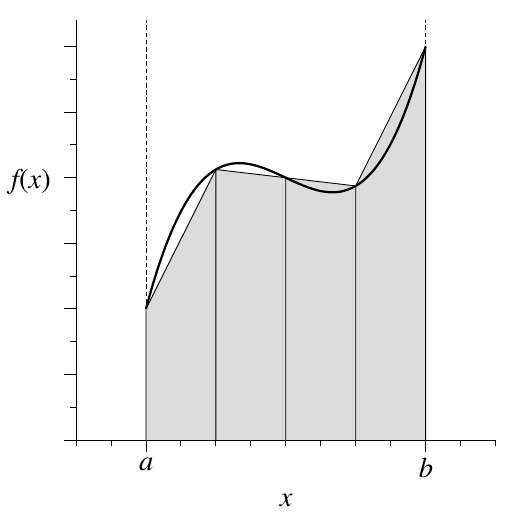
    
</center>
        </td>
    </tr>
</table>

In [ ]:
def myIntTrapz(f, a, b, N):
    
    delta = (b - a) / N

    xi = np.arange(a, b, delta) # excludes b 

    ANum  = f(a) + f(b) 
    ANum += 2.0 * np.sum( f(xi[1:]) )   # note: we already excluded b
    ANum *= delta / 2.0

    return ANum

print( myIntTrapz(f, a=0, b=2, N=10) )

Let's plot it:

In [ ]:
AnRiemann = []
AnTrapz = []
nList = np.arange(20, 100, 10)

for n in nList:
    
    AnRiemann.append( myIntRiemann(f, a=0, b=2, N=n, useNumpy=True) )
    AnTrapz.append( myIntTrapz(f, a=0, b=2, N=n) )
    
plt.figure(1)
plt.grid(True)

plt.plot(nList, AnRiemann, 'bo-', label='Riemann')
plt.plot(nList, AnTrapz, 'ro-', label='Trapz')
    
plt.xlabel("N")
plt.ylabel("numerical integral")
plt.legend()
plt.show()

## Numerical Integration: Gaussian Quadrature
---
... similar idea, but more sophisticated weighting functions.

In [ ]:
import scipy.integrate as integrate

Integrate `f(x)` from `a` to `b` using Gaussian quadrature of order `n`:

In [ ]:
Ann, error = integrate.fixed_quad(f, a=0, b=2, n=4)
print( Ann )

Integrate `f(x)` from `a` to `b` using Gaussian quadrature of automatic order:

In [ ]:
Ann, error = integrate.quad(f, a=0, b=2)
print( Ann )

Compare all methods:

In [ ]:
%timeit Ann, error = integrate.quad(f, a=0, b=2)
%timeit Ann        = myIntRiemann(f, a=0, b=2, N=100, useNumpy=True)
%timeit Ann        = myIntTrapz(f, a=0, b=2, N=100)

## Numerical Integration: Comparison
---
$$ A = \int_0^4 cos^2(x) \, dx$$

In [ ]:
def f(x):
    return np.cos(x)**2.0

x = np.linspace(0, 4, 100)

plt.figure(1)
plt.plot(x, f(x))
plt.show()

Compare accuracies of all methods:

In [ ]:
AnRiemann = []
AnTrapz = []
AnQuad = []

nList = np.arange(10, 20, 1)

for n in nList:
    AnRiemann.append( myIntRiemann(f, a=0, b=4, N=n, useNumpy=True) )
    AnTrapz.append( myIntTrapz(f, a=0, b=4, N=n) )
    AnQuad.append( integrate.quad(f, a=0, b=4)[0] )
    
plt.figure(1)
plt.grid(True)
    
plt.plot(nList, AnRiemann, 'bo-', label='Riemann')
plt.plot(nList, AnTrapz, 'go-', label='Trapz')
plt.plot(nList, AnQuad, 'ro-',  label='Quad')
    
plt.xlabel("N")
plt.ylabel("numerical integral")
plt.legend()
plt.show()

## $\pm \infty$ as Integral Limits
---
$$ A = \int_0^\infty e^{-x} \, dx$$
Use a simple substitution:
$$
\begin{align*}
    x &= \frac{z}{1-z} \\
    \Rightarrow dx &= \frac{z \, dz}{(1-z)^2} + \frac{dz}{1-z} \\
    \Rightarrow A &= \int_0^{1} e^{-\frac{z}{1-z}} \left( \frac{z}{(1-z)^2} + \frac{1}{1-z} \right) dz
\end{align*}
$$

In [ ]:
def f(z):
    return np.exp(-z/(1-z)) * (z / (1-z)**2 + 1 / (1-z))

A, error = integrate.quad(f, a=0, b=1)
print( A )

... or just use `np.infty` as the upper limit:

In [ ]:
def f(x):
    return np.exp(-x)

A, error = integrate.quad(f, a=0, b=np.infty)
print( A )

## Integration of Sampled Data
---
So far we had a well defined function $y = f(x)$. But what should we do if we have just a sampled data set like $y_i = f(x_i)$ on a discrete set of $x_i$ points?

In [ ]:
# define some sample data
xi = np.array([0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70,  0.80])
yi = np.array([0.01, 0.09, 0.22, 0.40, 0.50, 0.45, 0.16, -0.62])

plt.figure(1)
plt.plot(xi, yi, 'bo')
plt.show()

### Strategy 1: Fit and use the fit-function in Scipy's quad
---

In [ ]:
# using, for example, a polynomial function
myFit = np.polyfit(xi, yi, deg=4)

# create a call-able function out of our fit coefficients
f = np.poly1d(myFit)

# and integrate this one via quad
A, error = integrate.quad(f, a=np.min(xi), b=np.max(xi))

# plot it
xfine = np.linspace(np.min(xi), np.max(xi), 100)

plt.plot(xi, yi, 'bo')
plt.plot(xfine, f(xfine), 'r-')
plt.text(0.4, -0.2, "$A = %4.3f$"%A, fontsize=16)
plt.show()

### Strategy 2: Use trapezoidal or Simpson's rule from `scipy.integrate`
---

In [ ]:
ATrapz = integrate.trapz(yi, x=xi)
print( ATrapz )

In [ ]:
ASimps = integrate.simps(yi, dx=0.1)
print( ASimps )

## Multi-dimensional Integrals
---
$$ A = \int_{x_a}^{x_b} \int_{t_a}^{t_b} \frac{ e^{-x\,t} }{t^2}  \, dx \, dt$$

In [ ]:
def f(x,t):
    return np.exp(-x*t) / t**2.0

x = np.linspace(1, 2, 100)
t = np.linspace(1, 3, 100)

plt.figure(1)

plt.subplot(2, 1, 1)
plt.plot(x, f(x, 1))
plt.xlabel('$x$')
plt.ylabel('$f(x,t=1)$')

plt.subplot(2, 1, 2)
plt.plot(t, f(2, t))
plt.xlabel('$t$')
plt.ylabel('$f(x=2,t)$')

plt.show()

Multi-dimensional integral via Scipy's `integrate.nquad()`:

In [ ]:
# definite limits
xa = 0
xb = 2

ta = 1
tb = 3

A, error = integrate.nquad(f, [[xa, xb],
                               [ta, tb]])

print( A )

In [ ]:
# indefinite limits
xa = 0
xb = np.inf

ta = 1
tb = np.inf

A, error = integrate.nquad(f, [[xa, xb],
                               [ta, tb]])

print( A )